## II. Programming

**1.** Using a stratified 80-20 training-testing split with a fixed seed (random_state=1),‬ assess in a single plot both the training and testing accuracies of a decision tree with‬ ‭minimum sample leaf in {1, 3, 5, 10, 25, 50, 100} and the remaining parameters as‬ ‭default.‬

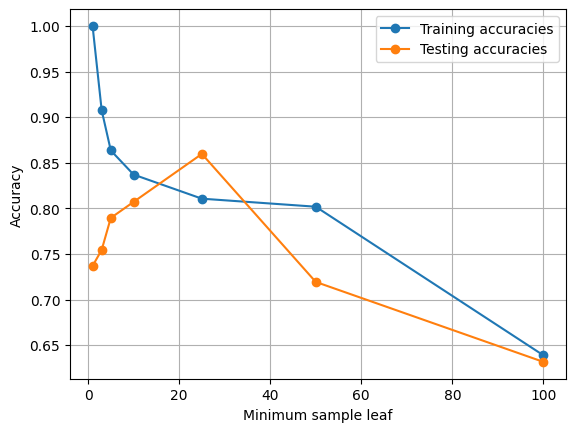

In [4]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

dados = pd.read_csv('hungarian_heart_diseases.csv')

# Separate the outcomes from the rest of the data
factors = dados.drop('outcome', axis=1)
outcomes = dados['outcome']

# Stratified split of the data: 80% for training, 20% for testing
factors_train, factors_test, outcomes_train, outcomes_test = train_test_split(factors, outcomes, train_size=0.8, random_state=1, stratify=outcomes)


min_sample_leaf = [1, 3, 5, 10, 25, 50, 100]
train_accuracies = []
test_accuracies = []

for i in min_sample_leaf:
    # Creates the model
    dec_tree = DecisionTreeClassifier(min_samples_leaf=i)
    
    # .fit() trains the model
    dec_tree.fit(factors_train, outcomes_train)
    
    
    # Predict outcomes from the training set and from the testing set
    predicted_outcomes_train = dec_tree.predict(factors_train)
    predicted_outcomes_test = dec_tree.predict(factors_test)
    
    # Compare with the actual outcomes from the training set and from the testing set
    train_acc = accuracy_score(outcomes_train, predicted_outcomes_train)
    test_acc = accuracy_score(outcomes_test, predicted_outcomes_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    
    

plt.plot(min_sample_leaf, train_accuracies, label="Training accuracies", marker='o')
plt.plot(min_sample_leaf, test_accuracies, label="Testing accuracies", marker='o')

# Show graph labels
plt.legend()

plt.xlabel("Minimum sample leaf")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

**2.** Critically analyze these results, including the generalization capacity across settings.‬

The models show poor generalization capacity for the lower minimum sample leaf values, since the accuracy of the testing set is far less than the accuracy of the training set. This happens because the model is too used to the data in the training set and is unable to make good predictions for new data, a situation known as overfitting.

However, when the minimum sample leaf is 10, the gap between the accuracies is much smaller and at 25 the testing accuracy is actually bigger than the training accuracy. This indicates that the models with these minimum sample leaf values have a good generalization capacity, being able to predict fairly well the correct outcomes given new data.

With minimum sample leaf equal to 50 the testing accuracy is once again much lower than the training one, indicating that the model with this setting is not a good predictive model either. At minimum sample leaf 100, even though the testing and training accuracies are almost the same, since the accuracy is overall very low (not even 65%) this model doesn't have a good generalization capacity either, and even indicates signs of underfitting, since not even the training accuracy is decent.

Through this graph and its analysis we can thus conclude that the best settings for the model are with the minimum sample leaf equal to either 10 or 25.


**3.** A healthcare provider requested the development of a predictive model achieving at‬ ‭least ‬‭80% validation accuracy and 78.5% test accuracy‬‭.‬‭The dataset must be split into‬ training, validation, and testing sets (60–20–20), using a stratified split.

The goal is to‬ identify a model that satisfies the required accuracy within the following hyperparameter‬
‭ranges: max_depth ∈ [2,4] and min_samples_split ∈ [2,100]. All other hyperparameters‬
‭should be kept at their default values. Use random_state = 1 to split the data and to‬
‭create the model.‬

‭**i.** Plot the decision tree.

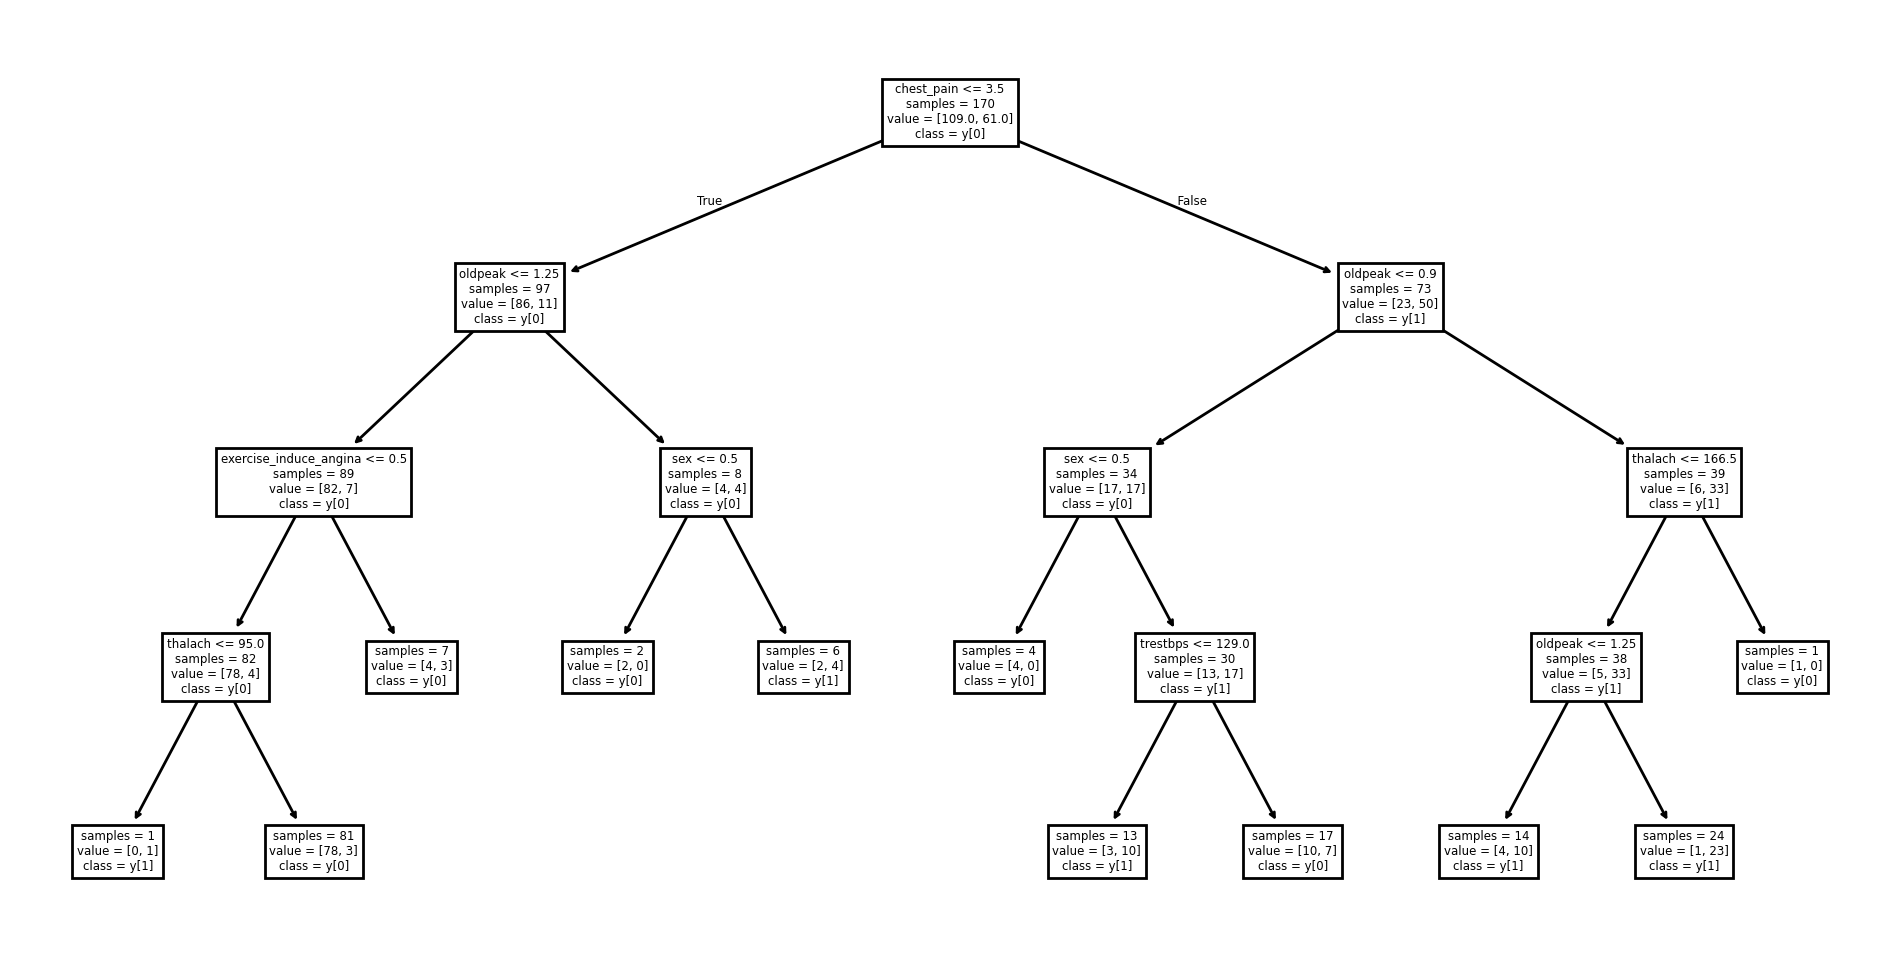

Validation acc: 0.8771929824561403
Test acc: 0.8245614035087719
Maximum depth: 4, Minimum Samples Split: 8


In [6]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

dados = pd.read_csv('hungarian_heart_diseases.csv')

# Separate the outcomes from the rest of the data
factors = dados.drop('outcome', axis=1)
outcomes = dados['outcome']


'''
60-20-20 split

80-20 split done with 20% for testing

the 80% from before is now 100% of the training+validation dataset
therefore, 60% from before is now x

80/60 = 100/x
x = 100*60/80 = 75

split training-validation is now 75-25
it checks out because 75% of 80% is 60% (0.75 * 0.8 = 0.6)
'''

factors_train_val, factors_test, outcomes_train_val, outcomes_test \
= train_test_split(factors, outcomes, train_size=0.8, random_state=1, stratify=outcomes)

factors_train, factors_val, outcomes_train, outcomes_val \
= train_test_split(factors_train_val, outcomes_train_val, train_size=0.75, random_state=1, stratify=outcomes_train_val)



# Despite the exercise not specifically asking for the best tree, since the minimum validation and testing accuracies 
# are satisfied right away in the first iteration of the loop (minimum_sample_split =2 and max_depth = 2),
# we opted for exploring all possible depths and sample splits and find the tree with best validation accuracy
        
min_val_accuracy = 0.8
min_test_accuracy = 0.785


best_val_accuracy = 0
best_depth = 0
best_split = 0
#best_test_accuracy = 0
best_tree = None

# min_samples_split ∈ [2, 100] and max_depth ∈ [2, 4]
# depth of 2 is too restrictive so it's better to try changing the depth before the minimum split
for sample_split in range(2, 101):
    for depth in range(2, 5):
        dec_tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=sample_split, random_state=1)
        
        dec_tree.fit(factors_train, outcomes_train)
        
        predicted_outcomes_val = dec_tree.predict(factors_val)
        val_accuracy = accuracy_score(outcomes_val, predicted_outcomes_val)
        
        
        if val_accuracy >= min_val_accuracy and val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_depth = depth
            best_split = sample_split
            best_tree = dec_tree
        

        
        
predicted_outcomes_test = best_tree.predict(factors_test)
test_accuracy = accuracy_score(outcomes_test, predicted_outcomes_test)

if test_accuracy >= min_test_accuracy:
    figure = plt.figure(figsize=(12, 6), dpi=200)
    plot_tree(best_tree, feature_names=factors.columns, class_names=True, impurity=False)
    plt.show()
   
    print("Validation acc: " + str(best_val_accuracy))
    print("Test acc: " + str(test_accuracy))
    print("Maximum depth: " + str(best_depth) + ", Minimum Samples Split: " + str(best_split))
        
else:
    print("No model found that satisfies the requirements.")




    



**i‭i.** Explain what characterizes heart diseases by identifying the conditional‬
‭associations together with their posterior probabilities.‬

The probability of heart disease depending on the several combinations of factors can be calculated at each leaf of the tree, by taking the number of samples of the leaf's class and dividing by the total number of samples on that leaf.


- chest_pain <= 3.5
    - oldpeak <= 1.25
        - exercise_induce_angina <= 0.5
            - thalach <= 95
                - **P(heart disease) = 1/1 = 100%**
            - thalach > 95
                - **P(heart disease) = 78/81 = 96.3%**
        - exercise_induce_angina > 0.5
            - **P(heart disease) = 4/7 = 57.1%**
    - oldpeak > 1.25
        - sex <= 0.5
            - **P(heart disease) = 2/2 = 100%**
        - sex > 0.5
            - **P(heart disease) = 4/6 = 66.7%**
            
- chest_pain > 3.5
    - oldpeak <= 0.9
        - sex <= 0.5
            - **P(heart disease) = 4/4 = 100%**
        - sex > 0.5
            - trestbps <= 129
                - **P(heart disease) = 10/13 = 76.9%**
            - trestbps > 129
                - **P(heart disease) = 10/17 = 58.8%**
    - oldpeak > 0.9
        - thalach <= 166.5
            - oldpeak <= 1.25
                - **P(heart disease) = 10/14 = 71.4%**
            - oldpeak > 1.25
                - **P(heart disease) = 23/24 = 95.8%**
        - thalach > 166.5
            - **P(heart disease) = 1/1 = 100%**
        
        
By analyzing the posterior probabilities of each leaf node, we can identify several factors that indicate the presence of heart disease. However, we must be aware of the number of samples in each leaf node since the probabilities may be misleading. For example, in the conditional association

 - chest_pain <= 3.5 and oldpeak <= 1.25 and thalach <= 95

the probability of heart disease is 100% but since there is only 1 person with this combination of factors this is not enough to guarantee or predict heart disease in this case.

Not taking into account the leaf nodes with only 1, 2 or 4 samples, we can conclude that the conditional associations that are more likely to indicate heart disease are:

1. chest_pain <= 3.5 and oldpeak <= 1.25 and exercise_induce_angina < 0.5 and thalach > 95, with a probability of 96.3%
2. chest_pain > 3.5 and oldpeak <= 0.9 and sex > 0.5 and trestbps <= 129, with a probability of 76.9%
3. chest_pain > 3.5 and oldpeak > 0.9 and thalach <= 166.5 and oldpeak > 1.25, with a probability of 95.8%

All 3 of these branches predict heart disease with a probability higher than 75%, meaning there should be at least great concern with patients that fit into these features. However, patients that fit into the 1st and 3rd of the above conditional associations need immediate attention as they are in critical risk for heart disease, with probability above 95%.

In cardiology, chest pain is usually measured in a scale until 4, with 4 being no pain or discomfort at all. Even though a lot of leaf nodes in the chest_pain <= 3.5 side of the tree have few samples, it is still clear that the probabilities of heart disease in this side of the tree are overall greater than those with chest_pain > 3.5. Thus meaning that chest pain is the biggest indicator for heart disease. The oldpeak, which measures the stress on the heart during exercise compared to rest, is also a big decisive factor in predicting heart disease.
